<a href="https://colab.research.google.com/github/armandordorica/Twitter_Sentiment_Analysis/blob/master/Twitter_sentiment_analysis_(Naive_Bayes).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
import tweepy 
from textblob import TextBlob
from wordcloud import WordCloud
import pandas as pd
import numpy as np
import re 
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')

In [15]:
# Load the data
from google.colab import files
uploaded = files.upload()


Saving twitter_credentials_2.csv to twitter_credentials_2.csv


In [0]:
df = pd.read_csv("twitter_credentials_2.csv")

In [65]:
df

,Name,Key
0,API_key,QTJhH4RuaIFjBX0mMoOuFWfdD
1,API_secret_key,bL46D6ikelftA41Sy3iTPPgi0vdgU8gCDk5AddE96fn8DY...
2,access_token,98177702-eqSOVsXXFQefnqHq1yq0QudnQP5rOfsd9BoN3...
3,access_token_secret,MepMWPMNgN2AnyUmTFzshLsFMPESbP5YhwmEkScIrIa9U


In [0]:
consumerKey = df['Key'].iloc[0]

In [0]:
consumerSecret = df['Key'].iloc[1]

In [0]:
accessToken = df['Key'].iloc[2]

In [0]:
accessTokenSecret = df['Key'].iloc[3]

### Create authentication object

In [0]:
authenticate = tweepy.OAuthHandler(consumerKey, consumerSecret)

### Set the access token and access token secret

In [0]:
authenticate.set_access_token(accessToken, accessTokenSecret)

### Create the API object while passing in the auth information

In [0]:
api = tweepy.API(authenticate, wait_on_rate_limit= True)

### Extract 100 tweets from twitter user

In [0]:
#save the id of the oldest tweet less one
username = "realDonaldTrump"

alltweets = []	
new_tweets = api.user_timeline(screen_name = username,count=200)

#save most recent tweets
alltweets.extend(new_tweets)

#save the id of the oldest tweet less one

oldest = alltweets[-1].id - 1

posts = api.user_timeline(screen_name = username, count = 200, max_id=oldest, tweet_mode="extended")

### Print the last 5 tweets from the account

In [86]:
type(posts[0])

tweepy.models.Status

In [87]:
print("Show the 5 recent tweets: \n ")
i = 1
for tweet in posts[0:5]:
  print(str(i) + ')' +  tweet.full_text + "\n")
  i = i+1

Show the 5 recent tweets: 
 
1)30 DAYS TO SLOW THE SPREAD https://t.co/GIzwKSt5mq

2).....Could be as high as 15 Million Barrels. Good (GREAT) news for everyone!

3)Just spoke to my friend MBS (Crown Prince) of Saudi Arabia, who spoke with President Putin of Russia, &amp; I expect &amp; hope that they will be cutting back approximately 10 Million Barrels, and maybe substantially more which, if it happens, will be GREAT for the oil &amp; gas industry!

4)“The States have to get the money to the people who need it.” @MariaBartiromo  And FAST!

5)RT @parscale: 💯 

Great idea!



In [0]:
df = pd.DataFrame([tweet.full_text for tweet in posts], columns = ['Tweets'])

In [89]:
df.head()

,Tweets
0,30 DAYS TO SLOW THE SPREAD https://t.co/GIzwKS...
1,.....Could be as high as 15 Million Barrels. G...
2,Just spoke to my friend MBS (Crown Prince) of ...
3,“The States have to get the money to the peopl...
4,RT @parscale: 💯 \n\nGreat idea!


### Cleaning the data to remove URLs and mentions 

In [0]:
# Create a function to clean the tweets
def cleanTxt(text):
 text = re.sub('@[A-Za-z0–9]+', '', text) #Removing @mentions
 text = re.sub('#', '', text) # Removing '#' hash tag
 text = re.sub('RT[\s]+', '', text) # Removing RT
 text = re.sub('https?:\/\/\S+', '', text) # Removing hyperlink
 
 return text


# Clean the tweets
df['Tweets'] = df['Tweets'].apply(cleanTxt)

In [91]:
df 

,Tweets
0,30 DAYS TO SLOW THE SPREAD
1,.....Could be as high as 15 Million Barrels. G...
2,Just spoke to my friend MBS (Crown Prince) of ...
3,“The States have to get the money to the peopl...
4,: 💯 \n\nGreat idea!
...,...
195,"The Defense Production Act is in full force, b..."
196,Keep Charlie Number One. Great Book!
197,": Hey , what does the Kennedy Center have to d..."
198,: When Nancy Pelosi receives a bill that will ...


In [0]:

# Create a function to get the subjectivity
def getSubjectivity(text):
   return TextBlob(text).sentiment.subjectivity

# Create a function to get the polarity
def getPolarity(text):
   return  TextBlob(text).sentiment.polarity


# Create two new columns 'Subjectivity' & 'Polarity'
df['Subjectivity'] = df['Tweets'].apply(getSubjectivity)
df['Polarity'] = df['Tweets'].apply(getPolarity)

In [93]:
df

,Tweets,Subjectivity,Polarity
0,30 DAYS TO SLOW THE SPREAD,0.400,-0.300000
1,.....Could be as high as 15 Million Barrels. G...,0.630,0.620000
2,Just spoke to my friend MBS (Crown Prince) of ...,0.550,0.100000
3,“The States have to get the money to the peopl...,0.600,0.250000
4,: 💯 \n\nGreat idea!,0.750,1.000000
...,...,...,...
195,"The Defense Production Act is in full force, b...",0.275,0.218750
196,Keep Charlie Number One. Great Book!,0.750,1.000000
197,": Hey , what does the Kennedy Center have to d...",0.100,-0.100000
198,: When Nancy Pelosi receives a bill that will ...,0.050,-0.050000


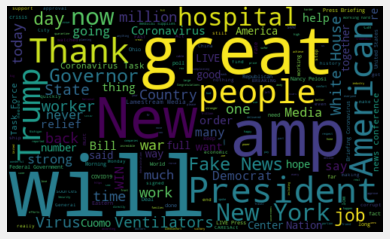

In [94]:
 # Show the new dataframe with columns 'Subjectivity' & 'Polarity'
df

'''
Let's see how well the sentiments are distributed. 
A good way to accomplish this task is by understanding the common words by plotting word clouds.
A word cloud (also known as text clouds or tag clouds) is a visualization, the more a specific word 
appears in text, the bigger and bolder it appears in the word cloud.
Let’s visualize all the words in the data using the word cloud plot.
'''

allWords = ' '.join([twts for twts in df['Tweets']])
wordCloud = WordCloud(width=500, height=300, random_state=21, max_font_size=110).generate(allWords)


plt.imshow(wordCloud, interpolation="bilinear")
plt.axis('off')
plt.show()


In [95]:


# Create a function to compute negative (-1), neutral (0) and positive (+1) analysis
def getAnalysis(score):
 if score < 0:
  return 'Negative'
 elif score == 0:
  return 'Neutral'
 else:
  return 'Positive'


df['Analysis'] = df['Polarity'].apply(getAnalysis)

# Show the dataframe
df

,Tweets,Subjectivity,Polarity,Analysis
0,30 DAYS TO SLOW THE SPREAD,0.400,-0.300000,Negative
1,.....Could be as high as 15 Million Barrels. G...,0.630,0.620000,Positive
2,Just spoke to my friend MBS (Crown Prince) of ...,0.550,0.100000,Positive
3,“The States have to get the money to the peopl...,0.600,0.250000,Positive
4,: 💯 \n\nGreat idea!,0.750,1.000000,Positive
...,...,...,...,...
195,"The Defense Production Act is in full force, b...",0.275,0.218750,Positive
196,Keep Charlie Number One. Great Book!,0.750,1.000000,Positive
197,": Hey , what does the Kennedy Center have to d...",0.100,-0.100000,Negative
198,: When Nancy Pelosi receives a bill that will ...,0.050,-0.050000,Negative


In [96]:
df.loc[97]['Tweets']

': "We will stop at nothing to protect the people of our country." -  \n\nCOVID19 USNavyAlwaysThere '

In [97]:

# Printing positive tweets 
print('Printing positive tweets:\n')
j=1
sortedDF = df.sort_values(by=['Polarity']) #Sort the tweets
for i in range(0, sortedDF.shape[0] ):
  if( sortedDF['Analysis'][i] == 'Positive'):
    print(str(j) + ') '+ sortedDF['Tweets'][i])
    print()
    j= j+1

Printing positive tweets:

1) .....Could be as high as 15 Million Barrels. Good (GREAT) news for everyone!

2) Just spoke to my friend MBS (Crown Prince) of Saudi Arabia, who spoke with President Putin of Russia, &amp; I expect &amp; hope that they will be cutting back approximately 10 Million Barrels, and maybe substantially more which, if it happens, will be GREAT for the oil &amp; gas industry!

3) “The States have to get the money to the people who need it.”   And FAST!

4) : 💯 

Great idea!

5) : Mr. President 
With total respect and recognizing you are doing more than any President has .. Please have 1…

6) : Great to hear! CA’s Gov Newsom about 

“Let me just be candid with you. I’d be lying to you to say that…

7) : . doesn’t care if you’re a Democrat or a Republican.
 
He has shown he is willing to work with everyone,…

8) : “The last time America faced an economic downturn, Michigan suffered mightily.  is working overtime to m…

9) : A big thanks to all the workers of ups, us

In [98]:
# Printing negative tweets  
print('Printing negative tweets:\n')
j=1
sortedDF = df.sort_values(by=['Polarity'],ascending=False) #Sort the tweets
for i in range(0, sortedDF.shape[0] ):
  if( sortedDF['Analysis'][i] == 'Negative'):
    print(str(j) + ') '+sortedDF['Tweets'][i])
    print()
    j=j+1

Printing negative tweets:

1) 30 DAYS TO SLOW THE SPREAD 

2) Massive amounts of medical supplies, even hospitals and medical centers, are being delivered directly to states and hospitals by the Federal Government. Some have insatiable appetites &amp; are never satisfied (politics?). Remember, we are a backup for them. The complainers should...

3) ...It wouldn’t matter if you got ten times what was needed, it would never be good enough. Unlike other states, New York unfortunately got off to a late start. You should have pushed harder. Stop complaining &amp; find out where all of these supplies are going. Cuomo working hard!

4) Upon information and belief, Iran or its proxies are planning a sneak attack on U.S. troops and/or assets in Iraq. If this happens, Iran will pay a very heavy price, indeed!

5) 30 DAYS TO SLOW THE SPREAD
COVIDー19  

6) My Administration is helping U.S. auto workers by replacing the failed Obama Emissions Rule. Impossible to satisfy its Green New Deal Standard;

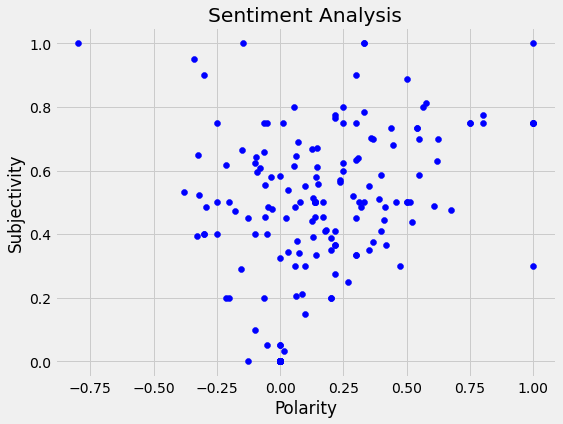

In [99]:

# Plotting
plt.figure(figsize=(8,6))
for i in range(0, df.shape[0]):
 plt.scatter(df["Polarity"][i], df["Subjectivity"][i], color='Blue') # plt.scatter(x,y,color)
 
plt.title('Sentiment Analysis')
plt.xlabel('Polarity')
plt.ylabel('Subjectivity')
plt.show()



In [100]:

# Print the percentage of positive tweets
ptweets = df[df.Analysis == 'Positive']
ptweets = ptweets['Tweets']
ptweets

round( (ptweets.shape[0] / df.shape[0]) * 100 , 1)


56.0

In [101]:

# Print the percentage of negative tweets
ntweets = df[df.Analysis == 'Negative']
ntweets = ntweets['Tweets']
ntweets

round( (ntweets.shape[0] / df.shape[0]) * 100, 1)

20.0

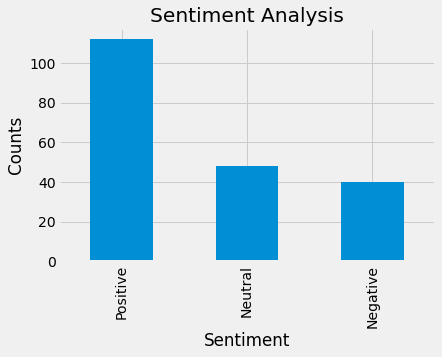

In [102]:
# Show the value counts
df['Analysis'].value_counts()

# Plotting and visualizing the counts
plt.title('Sentiment Analysis')
plt.xlabel('Sentiment')
plt.ylabel('Counts')
df['Analysis'].value_counts().plot(kind = 'bar')
plt.show()